# The Solow Growth Model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import sympy as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from collections import defaultdict

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject as mp

# Model description

We will use the Solow Growth model in this assignment
The Solow Growth model is an exogenous model for economic growth, which analyzes changes in the level of output over time in an economy as a result of changes in the savings rate, population growth and the rate of technology. 

Assumptions:
The population grows at a constant rate g, so the population growth equation is given by 
$$N_{t+1}=N(1+g)$$

All consumers save a constant proportion s of their income and consume the rest and the consumptions equation therefor becomes: 
$$C=(1-s)\cdot Y$$

All firms in the economy produce output using the same production technology, where the inputs are capital and labor. We assume Cobb-Douglas production function which is given by:
$$Y=A\cdot K^\alpha \cdot L^{1-\alpha}$$ 

The capital accumulation is given by:
$$K_{t+1}=K\cdot (1-\delta) + I$$

Under the assumption of competitive equilibrium, we get the following:

The income expenditure indentity holds as an equilibrium condition: 
$$Y=C+1 $$
Consumers' budget constraint:
$$Y=C+S$$
Therefor, in equilibrium: 
$$I=S=s\cdot Y$$

The capital accumulation equation then becomes:
$$K_{t+1}=K\cdot (1-\delta) + s\cdot Y$$

The Solow model assumes that the production function has constant-returns-to-scale, therefor we focus on output per worker and capital per worker, which can be seen below along with their steady state which is given by *


$$y_{t+1}=A\cdot k^\alpha_{t+1}$$

$$k_{t+1}=k_t+s\cdot y_t-(\delta+n)\cdot k_t$$

$$k^*=\frac{s\cdot A}{\delta+n}^{\frac{1}{1-\alpha}}$$

$$y^*=A\cdot k^\alpha$$

We will use the Basic Solow Growth Model and create a table with relevant data for two countries, Country A and Country B, which is shown below. 

(0.0, 1.0, 0.0, 1.0)

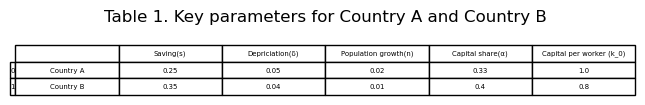

In [2]:
#We print the chousen variables that we are gonna use for the solow model in the exercise
#initialize figure
fig = plt.figure(figsize = (8, .2))
ax = fig.add_subplot(111)

#create table
ax.table(cellText = mp.df.values, rowLabels = mp.df.index, 
         colLabels = mp.df.columns, cellLoc='center')

#add title to table
ax.set_title('Table 1. Key parameters for Country A and Country B')

#turn axes off
ax.axis('off')

## Analytical solution

In this part we will answer two questions and give a visionary expression to those questions. 

**Question A: Simulate the covergence of capital per worker (k) and output per worker (y) to their steady-state levels for both countries over a period of 100 years**

We create a new function to simulate the Solow Growth Model over time, and we use that to simulate the Solow Growth Model for both countries over 100 years

This Solow Growth model for Country A and B is shown in the plot below with their respective steady state values. 

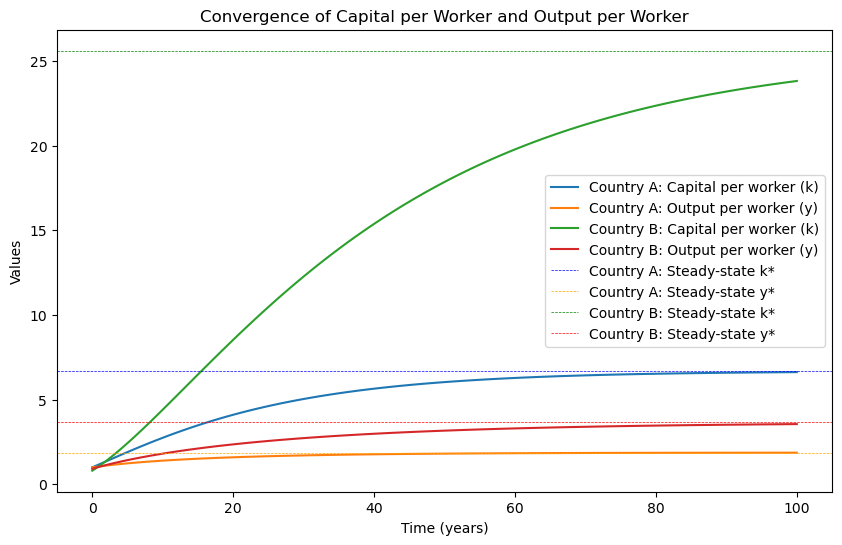

In [3]:
plt.figure(figsize=(10, 6))

#we create labels to the plot:
plt.plot(mp.k_A, label="Country A: Capital per worker (k)")
plt.plot(mp.y_A, label="Country A: Output per worker (y)")
plt.plot(mp.k_B, label="Country B: Capital per worker (k)")
plt.plot(mp.y_B, label="Country B: Output per worker (y)")

#We give specification to the lines, what they should show, color, label and linewidth 
plt.axhline(y=mp.steady_state_A[0], color='blue', linestyle='--', label="Country A: Steady-state k*", linewidth = '0.5')
plt.axhline(y=mp.steady_state_A[1], color='orange', linestyle='--', label="Country A: Steady-state y*", linewidth = '0.5')
plt.axhline(y=mp.steady_state_B[0], color='green', linestyle='--', label="Country B: Steady-state k*", linewidth = '0.5')
plt.axhline(y=mp.steady_state_B[1], color='red', linestyle='--', label="Country B: Steady-state y*", linewidth = '0.5')

#We give titles to the y- and x-axis:
plt.xlabel("Time (years)")
plt.ylabel("Values")

#We give title to the plot
plt.title("Convergence of Capital per Worker and Output per Worker")
plt.legend()
plt.show()

The plot shows that Country A's capital per worker (k, the blue line) reaches its steady state level (k*, the dashed blue line) after somewhere between 95-100 years with a value of approximately 7. Country A's output per worker (y, the orange line) reaches its steady state level (y*, the dashed yellow line) after about 35 years with a value of about 2.
Country B's capital per worker (k, the green line) does not reach its steady state level (k*, the dashed green line) at all within the time limit of 100 years with a value of approximately 25.5. Eventually, Country B's output per worker (y, the red line) reaches its steady state level (y*, the dashed red line) right around the 100 year mark. Possibly the first years after.

**Question B: Analyse how changes in the savings rate (s) for Country A would affect the steady-state levels of capital per worker $(k^\ast)$ and output per worker $(y^\ast)$. Create a sensitivity analysis plot to visualize the results.**

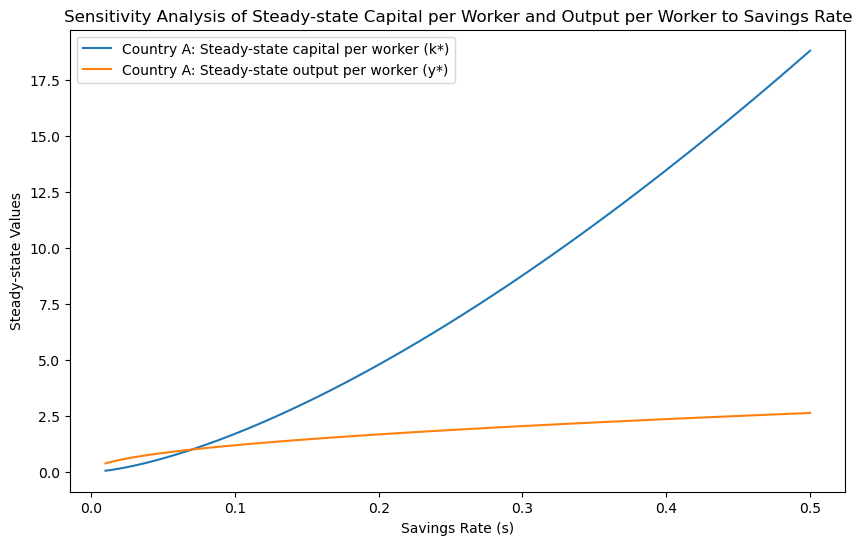

In [4]:
# Create a sensitivity analysis plot
plt.figure(figsize=(10, 6))
plt.plot(mp.s_values, mp.k_star_values_A, label="Country A: Steady-state capital per worker (k*)")
plt.plot(mp.s_values, mp.y_star_values_A, label="Country A: Steady-state output per worker (y*)")
plt.xlabel("Savings Rate (s)")
plt.ylabel("Steady-state Values")
plt.title("Sensitivity Analysis of Steady-state Capital per Worker and Output per Worker to Savings Rate")
plt.legend()
plt.show()

The plot shows a clear difference in the importance of the savings rate (s) for respectively steady state capital per worker (k*) and steady state output per worker (y*). It appears that a higher savings rate will mean that the steady state value for capital per worker (k*) increases significantly, while it has virtually no effect on output per worker (y*).

## Numerical solution

In this part we will give some numerical solutions to the plots above, which can give a more precisely explanations of the plots and the steady state values.  

**Question C: Calculate the steady-state capital per worker $(k^\ast)$ and output per worker $(y^\ast)$ for both countries.**

In [5]:
#Printing the steady state values for country A and B with three decimals 
print(f"Country A: k* = {mp.steady_state_A[0]:.3f}, y* = {mp.steady_state_A[1]:.3f}") # If wondering 0 V 1 are indexes for k and y
print(f"Country B: k* = {mp.steady_state_B[0]:.3f}, y* = {mp.steady_state_B[1]:.3f}")

Country A: k* = 6.686, y* = 1.872
Country B: k* = 25.615, y* = 3.659


These results means that for Country A, the steady state capital per worker value is 6.686 and the corresponding steady state output per worker is 1.872. Country B has a higher steady state point, which we also saw in the first plot. Country B has a steady state capital per worker value at 25.615 with the corresponding steady state output per worker at 3.659. 

**Question D: Calculate the time it takes for Country B to catch up with Country A in terms of income per worker (output per worker).**

In [6]:
catch_up_time = mp.find_catch_up_time(mp.y_A, mp.y_B)
if catch_up_time is not None:
    print(f"Country B will catch up with Country A in terms of income per worker in {catch_up_time} years.")
else:
    print("Country B will not catch up with Country A in terms of income per worker within the simulated time period.")

# The result gives us an indication of whether the B will catch up with Country A within the simulated time period

Country B will catch up with Country A in terms of income per worker in 2 years.


The result means that Country B will use 2 years more to catch up with Country A in terms of income per worker. 

# Further analysis

In the case, the sensitive test shows how the steady state values for income- and capital pr. worker changes for only country A to give an impression of how the saving rates affect steady state values. 


**Question E: Similar to question D - instead of analyzing the saving sensitivity, analyse the depreciation rate sensitivity for Country A, but this time it should be both visually and mathematically for the three different rates $\delta$ $\in$ (0.02, 0.05, 0.08) and set up a corresponding table**

We start by defining a new variable and the corresponding chosen values for the depreciation rates (0.02, 0.05, 0.08). This result is brought into a Table (2), which makes it more readable.

In [7]:
# Print the steady-state values for each depreciation rate
for i, delta in enumerate(mp.delta_values_specific):
    print(f"Depreciation rate (δ) = {delta}:")
    print(f"Country A: Steady-state capital per worker (k*) = {mp.k_star_values_A_delta_specific[i]}")
    print(f"Country A: Steady-state output per worker (y*) = {mp.y_star_values_A_delta_specific[i]}")
    print()

Depreciation rate (δ) = 0.02:
Country A: Steady-state capital per worker (k*) = 15.412767348456969
Country A: Steady-state output per worker (y*) = 2.466042775753115

Depreciation rate (δ) = 0.05:
Country A: Steady-state capital per worker (k*) = 6.685551931811203
Country A: Steady-state output per worker (y*) = 1.8719545409071368

Depreciation rate (δ) = 0.08:
Country A: Steady-state capital per worker (k*) = 3.9259097478746208
Country A: Steady-state output per worker (y*) = 1.5703638991498483



The result are given the steady state values for capital per worker (k*) and output per worker (y*) for Country A at different decpreciation rates. We have chosen three depreciation rates: 0.02, 0.05 and 0.08. 

The results above is shown in a table below to make it more presentable and with less decimals for the visionary.

In [8]:
# Print the table of the steady-state values for Country A
print("Table 2. Sensitivity Analysis of Steady-state Capital per Worker and Output per Worker to Depreciation Rate for Country A")
print(mp.table_2)

Table 2. Sensitivity Analysis of Steady-state Capital per Worker and Output per Worker to Depreciation Rate for Country A
   Depreciation Rate (δ)  Capital per Worker (k*)  Output per Worker (y*)
1                   0.02                15.412767                2.466043
2                   0.05                 6.685552                1.871955
3                   0.08                 3.925910                1.570364


We have omitted to write Country A and Steady-state in front of capital per worker (k*) and output per worker (y*), respectively, as the result was better presented.

The table shows that the higher the depreciation rate, the lower the steady state value for capital per worker (k*) and also for the steady state value for output per worker (y*). We see that the steady state values are highest when we have the lowest depreciation rate, which in our case is 0.02.

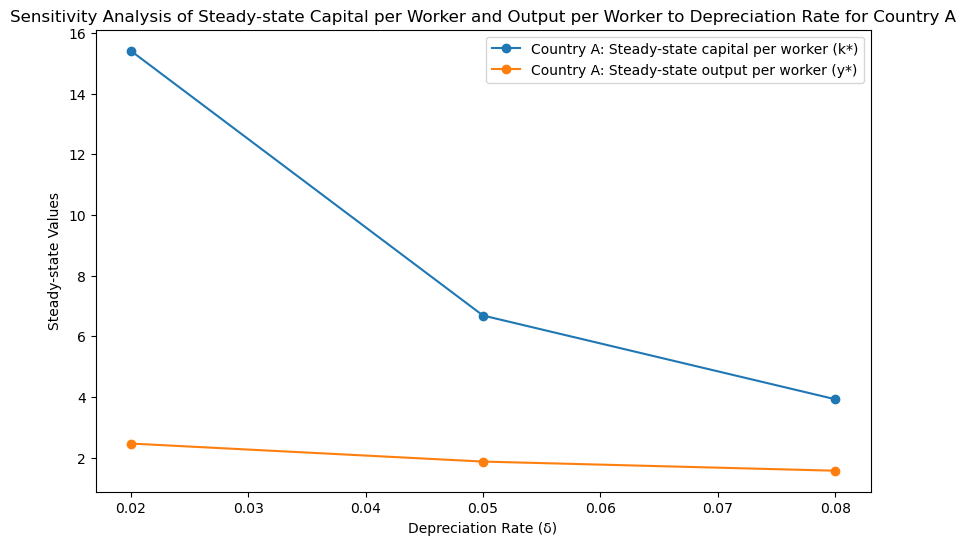

In [9]:
# Create a sensitivity analysis plot for Country A
plt.figure(figsize=(10, 6))
plt.plot(mp.delta_values_specific, mp.k_star_values_A_delta_specific, label="Country A: Steady-state capital per worker (k*)", marker="o")
plt.plot(mp.delta_values_specific, mp.y_star_values_A_delta_specific, label="Country A: Steady-state output per worker (y*)", marker="o")
plt.xlabel("Depreciation Rate (δ)")
plt.ylabel("Steady-state Values")
plt.title("Sensitivity Analysis of Steady-state Capital per Worker and Output per Worker to Depreciation Rate for Country A")
plt.legend()
plt.show()

The plot above shows the same conclusion as the table before. We see that the depreciation rate has a significantly greater effect on steady state capital per worker (k*), while it has a limited effect on steady state output per worker.
We further see that a higher depreciation rate results in a lower steady state capital per worker and steady state output per worker. This makes sense, as a higher rate of depreciation means that the value of capital and output declines. In particular, steady state capital per worker is the effect of a higher depreciation rate.

# Conclusion

We found that country B has a higher value of steady state for both capital and outout per worker, this is due to differences in the parameters. 
In the last part we look at country A and the impact of the deprecation rate. We see that the depreciation rate has a significantly greater effect on k* than y*. 